# **[Data4life] - Introduction to Data Science**
Topic ***NBA*** - Group ***13***

## **Our motivation**
The NBA is one of the most popular sports leagues worldwide. It has been captivating millions of fans with its teams, players and storied history. Because of its popularity, it generate vast amount of data from game statistics to player achievements lead to create an excellent opportunity to apply data science techniques to analyze trends, identify patterns and derive meaningful insights.

Our works is designed to serve for **sports enthusiasts** who will gain a richer understanding of individual game performance and season-wide trends, **Team and League Stakeholders** who will use these insights for better decision-making and the last one, **data science community** who can learn about practical applications of data science in sports and inspiring further exploration in this field. (I hope that :>>)

## **Our purpose**
- Provide NBA fans, analysts and stakeholders with deeper insights into team and player performance through data-drive approaches.
- Assist coaches, managers or team owners in optimizing strategies and resources.
- Demonstrate how data science can be applied to a real-world context, showcasing the power of statistical analysis and machine learning in sports analytics.

## **Our key objective**

### **Title 0: Overview of the Current NBA Situation**
- Provide an initial analysis to contextualize the state of the NBA.
- Break down insights into three main categories:
   1. Players
   2. Teams
   3. Data Modelling

### **Title 1: Players**

**Objective 1: Identify high-performing and consistent players (2020-2025)**
- Focus on players with high performance and consistency in the past five years.
- Use Efficiency (EFF) as the primary metric:

$$EFF = \frac{(PTS+REB+AST+STL+BLK)−((FGA−FGM)+(FTA−FTM)+TO)}{GP}$$
​
Where:
- PTS: Points scored
- REB: Total rebounds (offensive + defensive)
- AST: Assists
- STL: Steals
- BLK: Blocks
- FGA, FGM: Field goals attempted and made
- FTA, FTM: Free throws attempted and made
- TO: Turnovers
- GP: Games played

Analyze EFF trends:
- Evaluate EFF variability across seasons
- Analyze EFF changes with age (does performance decline as players get older?)

**Objective 2: Identify Top-performing rookies (2024-2025)**
- Focus only on the current season to identify rookies with standout performances
- Key metrics: EFF, PTS, REB, AST

**Objective 3: Analyze player performance by position**
- Break down player performance based on their roles:
  - Defensive Players: Metric like REB, STL, BLK
  - Attackers (Scores): Metric like PTS, FG%, 3P%
  - Playmakers (Shooting/Passing): Metric like AST, FG%, 3P%, FT%

Approach: 
- Calculate averages and standard deviations for EFF across years for consistency
- Segment players by position (DEF, ATK, Playmaker)
- Compare rookies' performance against established players

### **Title 2: Teams**

**Objective: Analyze Team Weaknesses**
- Identify areas where teams are underperforming:
   - If a team has a low offensive score (ATK), recommend acquiring players strong in scoring metrics (e.g., PTS, FG%, 3P%)
   - If a team has a weak defense, focus on players with high REB, STL, BLK

Approach:
- Aggregate team-level metrics (e.g., average PTS, REB, STL) and compare them across the league
- Identify statistically significant deficiencies (e.g., below the league average)
- Recommend specific player profiles to address these weakness

### **Title 3: Data Modelling**

**Objective: Predict Future Performance**
- Develop a model to predict whether a player's performance will remain high in the next season
- Use player data from past seasons to build predictive models, incorporating:
   - EFF
   - Age
   - Historical trends in metrics like PTS, REB, AST, STL, BLK

Approach:
1. Feature Engineering
   - Create relevant features (e.g., age, position, past EFF trends)

2. Train Predictive Models
   - Models: Linear regression, random forest or Neural Networks
   - Evaluate performance using metrics like RMSE or MAE

3. Test the model
   - Validate predictions against current season data to ensure accuracy



### **IMPORT MODULES**

In [1]:
# Packages for data manipulation
import numpy as np
import pandas as pd
from collections import Counter

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### **LOAD DATASETS**

In [2]:
# General datasets
nba_achievements = pd.read_csv(filepath_or_buffer='final_data/nba_achievements.csv')
nba_all_time_records = pd.read_csv(filepath_or_buffer='final_data/nba_all_time_records.csv')
nba_hall_of_fame = pd.read_csv(filepath_or_buffer='final_data/nba_hall_of_fame.csv')
season_meta = pd.read_csv(filepath_or_buffer='final_data/season_meta.csv')

# Team datasets
nba_active_teams = pd.read_csv(filepath_or_buffer='final_data/nba_active_teams.csv')
nba_defunct_teams = pd.read_csv(filepath_or_buffer='final_data/nba_defunct_teams.csv')
team_stats = pd.read_csv(filepath_or_buffer='final_data/team_stats.csv')
team_stats_per_game = pd.read_csv(filepath_or_buffer='final_data/team_stats_per_game.csv')
team_ratings = pd.read_csv(filepath_or_buffer='final_data/team_ratings.csv')

# Player datasets
nba_roster = pd.read_csv(filepath_or_buffer='final_data/nba_roster.csv')
nba_players = pd.read_csv(filepath_or_buffer='final_data/nba_players.csv')
player_stats = pd.read_csv(filepath_or_buffer='final_data/player_stats.csv')
player_stats_per_game = pd.read_csv(filepath_or_buffer='final_data/player_stats_per_game.csv')
rookie_stats = pd.read_csv(filepath_or_buffer='final_data/rookie_stats.csv')

### **OVERVIEW**

#### **Question 1: What are the structures of the NBA?**

In [ ]:
nba_active_teams['division'].value_counts()

division
Atlantic     5
Central      5
Southeast    5
Northwest    5
Pacific      5
Southwest    5
Name: count, dtype: int64

The NBA currently has **6 divisions** (each division has **5 teams**):
- **Eastern Conference**:
    - Atlantic Division.
    - Central Division.
    - Southeast Division.
- **Western Conference**:
    - Northwest Division.
    - Pacific Division.
    - Southwest Division.

#### **Question 2: How many teams are no longer active? For how long did they compete?**

In [ ]:
print(f'{len(nba_defunct_teams)} teams have ceased operations in the NBA.')

44 teams have ceased operations in the NBA.


In [ ]:
nba_defunct_teams['year'].value_counts().sort_index()

year
1    15
2    10
3     3
4     4
5     4
6     2
8     2
9     4
Name: count, dtype: int64

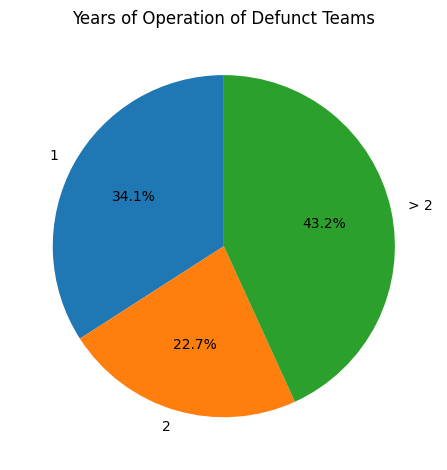

In [ ]:
nba_defunct_teams['year_segment'] = np.where(nba_defunct_teams['year'] == 1, '1', np.where(nba_defunct_teams['year'] == 2, '2', '> 2'))
nba_defunct_teams['year_segment'].value_counts().sort_index().plot.pie(startangle=90, autopct='%1.1f%%')
plt.title(label='Years of Operation of Defunct Teams')
plt.ylabel(ylabel='')
plt.tight_layout()
plt.show()

**COMMENTS**
- Over half of the teams that are no longer active have participated in the league for less than 3 years.
- The reasons for this may include:
    - Financial instability.
    - Relocation and rebranding.
    - Mergers with other teams.

#### **Question 3: Which teams have the most accomplishments?**   

In [4]:
achievements_by_team = nba_achievements['team'].value_counts().reset_index()
achievements_by_team.head()

,team,count
0,Los Angeles Lakers,69
1,Boston Celtics,63
2,San Antonio Spurs,33
3,Golden State Warriors,26
4,Miami Heat,25


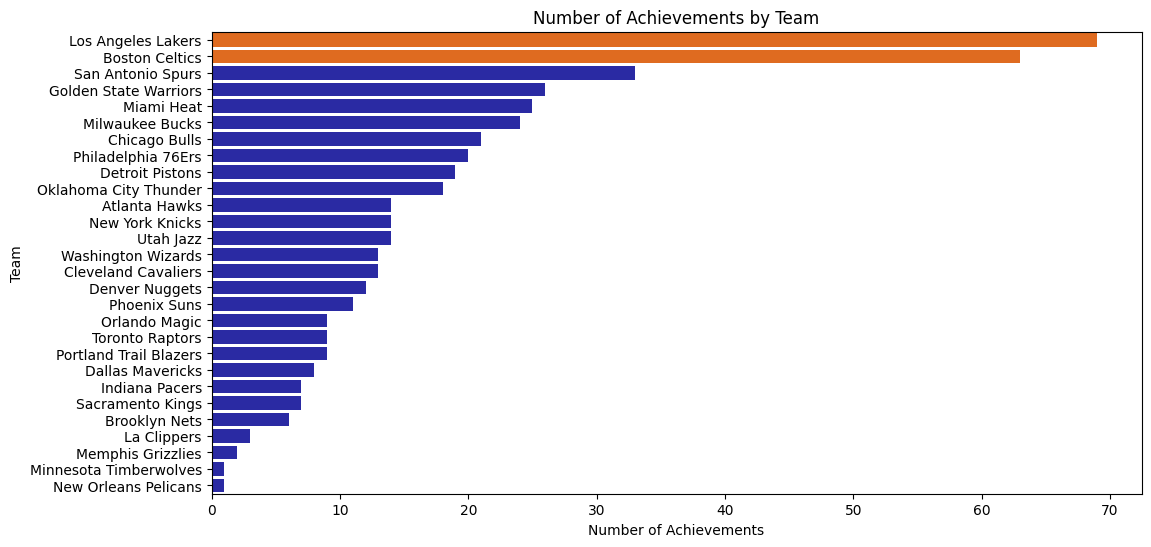

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(data=achievements_by_team, x='count', y='team', orient='h', hue='team',
            palette=['#FF6400' if count > 50 else '#1616B7' for count in achievements_by_team['count']])
plt.title(label='Number of Achievements by Team')
plt.xlabel(xlabel='Number of Achievements')
plt.ylabel(ylabel='Team')
plt.show()

**COMMENTS**
- The `Los Angeles Lakers` and `Boston Celtics` are the two teams with the most achievements across all categories.
- Next, let's examine each type of title to determine if they still hold the top positions.

In [6]:
division_titles_by_team = nba_achievements[nba_achievements['achievement_type'] == 'Division Titles']['team'].value_counts().head().reset_index()
conference_titles_by_team = nba_achievements[nba_achievements['achievement_type'] == 'Conference Titles']['team'].value_counts().head().reset_index()
championship_by_team = nba_achievements[nba_achievements['achievement_type'] == 'Championship Wins']['team'].value_counts().head().reset_index()

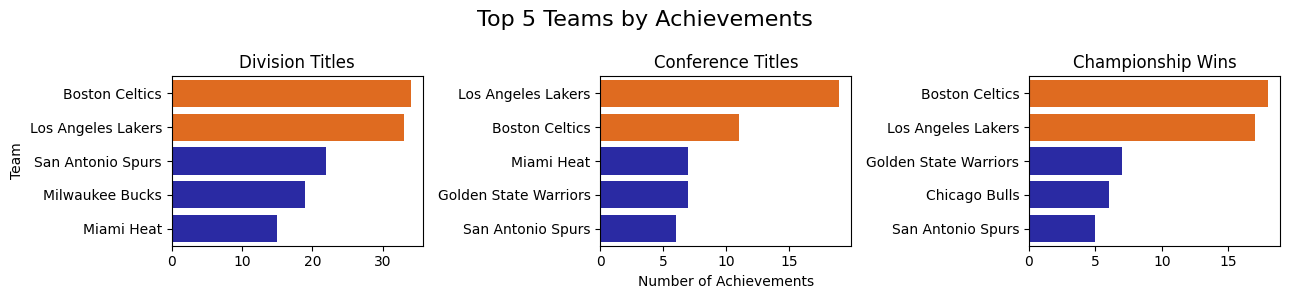

In [7]:
top_teams = ['Los Angeles Lakers', 'Boston Celtics']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 3))

sns.barplot(data=division_titles_by_team, x='count', y='team',
            hue='team', palette=['#FF6400' if team in top_teams else '#1616B7' for team in division_titles_by_team['team']],
            orient='h', ax=axes[0])
sns.barplot(data=conference_titles_by_team, x='count', y='team',
            hue='team', palette=['#FF6400' if team in top_teams else '#1616B7' for team in conference_titles_by_team['team']],
            orient='h', ax=axes[1])
sns.barplot(data=championship_by_team, x='count', y='team',
            hue='team', palette=['#FF6400' if team in top_teams else '#1616B7' for team in championship_by_team['team']],
            orient='h', ax=axes[2])

axes[0].set_xlabel(xlabel='')
axes[1].set_xlabel(xlabel='Number of Achievements')
axes[2].set_xlabel(xlabel='')

axes[0].set_ylabel(ylabel='Team')
axes[1].set_ylabel(ylabel='')
axes[2].set_ylabel(ylabel='')

plt.suptitle(t='Top 5 Teams by Achievements', fontsize=16)
axes[0].set_title(label='Division Titles')
axes[1].set_title(label='Conference Titles')
axes[2].set_title(label='Championship Wins')

plt.tight_layout()
plt.show()

**COMMENTS**
- As expected, the `Los Angeles Lakers` and `Boston Celtics` remain at the forefront of every league, dominating both their divisions, conferences, and championship titles.

#### **Question 4:**

In [8]:
nba_all_time_records['player'].value_counts()

player
Kevin Garnett            5
Michael Jordan           4
LeBron James             4
Giannis Antetokounmpo    4
Patrick Ewing            4
                        ..
Walter Davis             1
Steve Nash               1
James Harden             1
Tony Parker              1
Manu Ginobili            1
Name: count, Length: 89, dtype: int64

In [9]:
nba_all_time_records.iloc[nba_all_time_records.groupby(by='record_type')['stat_value'].idxmax()]

,team,record_type,player,stat_value
96,Utah Jazz,Total Assists,John Stockton,15806
133,Houston Rockets,Total Blocks,Hakeem Olajuwon,3740
95,Utah Jazz,Total Points,Karl Malone,36374
2,Boston Celtics,Total Rebounds,Bill Russell,21620
99,Utah Jazz,Total Steals,John Stockton,3265


In [10]:
nba_all_time_records['player'].value_counts()

player
Kevin Garnett            5
Michael Jordan           4
LeBron James             4
Giannis Antetokounmpo    4
Patrick Ewing            4
                        ..
Walter Davis             1
Steve Nash               1
James Harden             1
Tony Parker              1
Manu Ginobili            1
Name: count, Length: 89, dtype: int64

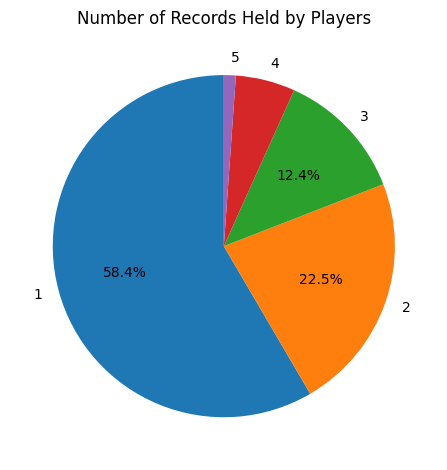

In [11]:
def autopct_format(pct, val):
    return f'{pct:.1f}%' if pct > val else ''

nba_all_time_records['player'].value_counts().value_counts().plot.pie(startangle=90, autopct=lambda pct: autopct_format(pct, 6))
plt.title(label='Number of Records Held by Players')
plt.ylabel(ylabel='')
plt.tight_layout()
plt.show()

In [12]:
nba_all_time_records[nba_all_time_records['player'] == 'Kevin Garnett']

,team,record_type,player,stat_value
80,Minnesota Timberwolves,Total Points,Kevin Garnett,19201
81,Minnesota Timberwolves,Total Assists,Kevin Garnett,4216
82,Minnesota Timberwolves,Total Rebounds,Kevin Garnett,10718
83,Minnesota Timberwolves,Total Blocks,Kevin Garnett,1590
84,Minnesota Timberwolves,Total Steals,Kevin Garnett,1315


In [13]:
nba_all_time_records.groupby(by='player')['team'].nunique().sort_values(ascending=False)

player
Alonzo Mourning       2
Chris Paul            2
Adonal Foyle          1
Alvan Adams           1
Alex English          1
                     ..
Udonis Haslem         1
Walt Frazier          1
Walter Davis          1
Wes Unseld            1
Zydrunas Ilgauskas    1
Name: team, Length: 89, dtype: int64

In [14]:
nba_all_time_records[nba_all_time_records['player'].isin(['Alonzo Mourning', 'Chris Paul'])]

,team,record_type,player,stat_value
58,Charlotte Hornets,Total Blocks,Alonzo Mourning,684
63,Miami Heat,Total Blocks,Alonzo Mourning,1625
106,La Clippers,Total Assists,Chris Paul,4023
141,New Orleans Pelicans,Total Assists,Chris Paul,4228
144,New Orleans Pelicans,Total Steals,Chris Paul,1010


In [15]:
print(f'There are {nba_hall_of_fame['player'].nunique()} players enshrined in the NBA Hall of Fame.')

There are 147 players enshrined in the NBA Hall of Fame.


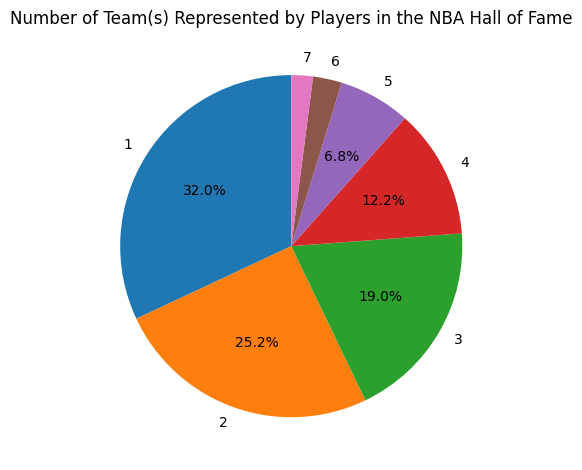

In [16]:
nba_hall_of_fame['player'].value_counts().value_counts().plot.pie(startangle=90, autopct=lambda pct: autopct_format(pct, 5))
plt.title(label='Number of Team(s) Represented by Players in the NBA Hall of Fame')
plt.ylabel(ylabel='')
plt.tight_layout()
plt.show()

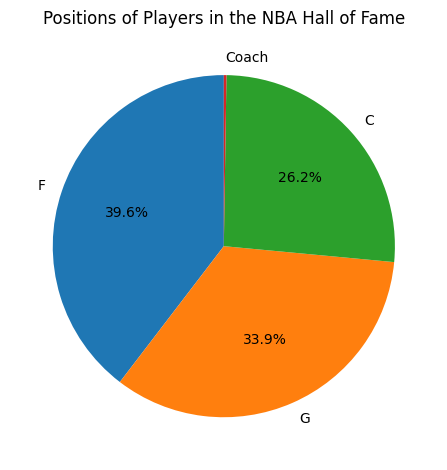

In [17]:
pd.DataFrame.from_dict(data=Counter([position for positions in nba_hall_of_fame['pos'] for position in positions.split('-')]),
                       orient='index', columns=['count']).plot.pie(y='count', startangle=90, autopct=lambda pct: autopct_format(pct, 1), legend=False)
plt.title(label='Positions of Players in the NBA Hall of Fame')
plt.ylabel(ylabel='')
plt.tight_layout()
plt.show()

In [18]:
nba_hall_of_fame[nba_hall_of_fame['pos'] == 'Coach']

,team,player,pos,seasons,year_of_induction
137,Indiana Pacers,"Bobby ""Slick"" Leonard",Coach,1969-1980,2014


In [19]:
nba_hall_of_fame[nba_hall_of_fame['player'] == 'Bobby "Slick" Leonard']

,team,player,pos,seasons,year_of_induction
97,Chicago Bulls,"Bobby ""Slick"" Leonard",G,1962,2014
137,Indiana Pacers,"Bobby ""Slick"" Leonard",Coach,1969-1980,2014
288,Los Angeles Lakers,"Bobby ""Slick"" Leonard",G,1957-1961,2014


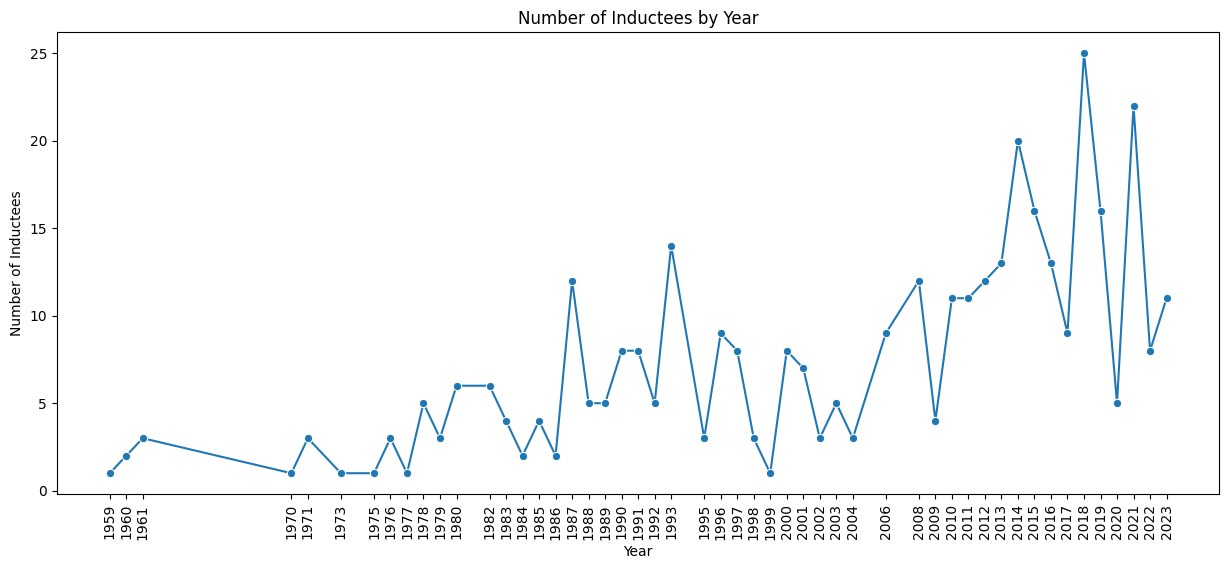

In [20]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=nba_hall_of_fame['year_of_induction'].value_counts().sort_index(), marker='o')
plt.xticks(ticks=nba_hall_of_fame['year_of_induction'].value_counts().sort_index().index, rotation=90)
plt.title(label='Number of Inductees by Year')
plt.xlabel(xlabel='Year')
plt.ylabel(ylabel='Number of Inductees')
plt.show()

In [21]:
season_meta[season_meta['season'] >= '2019-2020']['most_valuable_player'].str.split('(').str[0].str.strip().value_counts()

most_valuable_player
Nikola Jokić             3
Giannis Antetokounmpo    1
Joel Embiid              1
Name: count, dtype: int64

In [22]:
season_meta[season_meta['season'] >= '2019-2020']['ppg_leader'].str.split('(').str[0].str.strip().value_counts()

ppg_leader
Joel Embiid      2
James Harden     1
Stephen Curry    1
Luka Dončić      1
Name: count, dtype: int64

In [23]:
season_meta[season_meta['season'] >= '2019-2020']['rpg_leader'].str.split('(').str[0].str.strip().value_counts()

rpg_leader
Domantas Sabonis    2
Andre Drummond      1
Clint Capela        1
Rudy Gobert         1
Name: count, dtype: int64

In [24]:
season_meta[season_meta['season'] >= '2019-2020']['apg_leader'].str.split('(').str[0].str.strip().value_counts()

apg_leader
LeBron James         1
Russell Westbrook    1
Chris Paul           1
James Harden         1
Tyrese Haliburton    1
Name: count, dtype: int64

In [25]:
season_meta[season_meta['season'] >= '2019-2020']['ws_leader'].str.split('(').str[0].str.strip().value_counts()

ws_leader
Nikola Jokić    4
James Harden    1
Name: count, dtype: int64

In [26]:
season_meta.tail()

,league_champion,most_valuable_player,rookie_of_the_year,ppg_leader,rpg_leader,apg_leader,ws_leader,season
25,Los Angeles Lakers,Giannis Antetokounmpo (29.5/13.6/5.6),Ja Morant (17.8/3.9/7.3),James Harden (34.3),Andre Drummond (15.2),LeBron James (10.2),James Harden (13.1),2019-2020
26,Milwaukee Bucks,Nikola Jokić (26.4/10.8/8.3),LaMelo Ball (15.7/5.9/6.1),Stephen Curry (32.0),Clint Capela (14.3),Russell Westbrook (11.7),Nikola Jokić (15.6),2020-2021
27,Golden State Warriors,Nikola Jokić (27.1/13.8/7.9),Scottie Barnes (15.3/7.5/3.5),Joel Embiid (30.6),Rudy Gobert (14.7),Chris Paul (10.8),Nikola Jokić (15.2),2021-2022
28,Denver Nuggets,Joel Embiid (33.1/10.2/4.2),Paolo Banchero (20.0/6.9/3.7),Joel Embiid (33.1),Domantas Sabonis (12.3),James Harden (10.7),Nikola Jokić (14.9),2022-2023
29,Boston Celtics,Nikola Jokić (26.4/12.4/9.0),Victor Wembanyama (21.4/10.6/3.9),Luka Dončić (33.9),Domantas Sabonis (13.7),Tyrese Haliburton (10.9),Nikola Jokić (17.0),2023-2024


#### **Players**

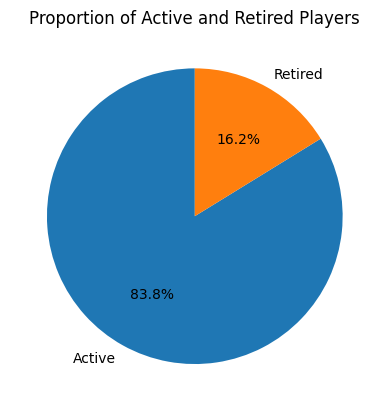

In [31]:
nba_players['retired'].value_counts().plot.pie(labels=['Active', 'Retired'], startangle=90, autopct='%1.1f%%')
plt.title(label='Proportion of Active and Retired Players')
plt.ylabel(ylabel='')
plt.show()

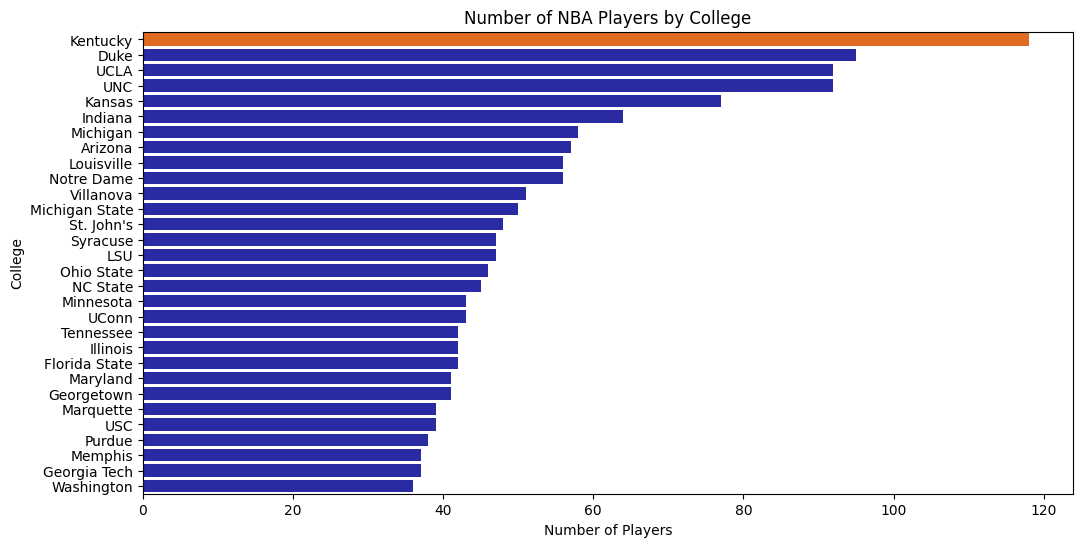

In [32]:
college_counts = nba_players['colleges'].value_counts().head(n=30).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=college_counts, x='count', y='colleges', orient='h',
            hue='colleges', palette=['#FF6400' if count > 110 else '#1616B7' for count in college_counts['count']])
plt.title(label='Number of NBA Players by College')
plt.xlabel(xlabel='Number of Players')
plt.ylabel(ylabel='College')
plt.show()